# Understanding_the_problem


we have dataset of the people on the titanic based on those data we need to build a predictive model to pridictive what is the possibility of their survival.

1. Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("libraries imported")

libraries imported


In [2]:
train_df=pd.read_csv("train.csv")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_df=pd.read_csv('test.csv')
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Exploratary Data Analysis

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


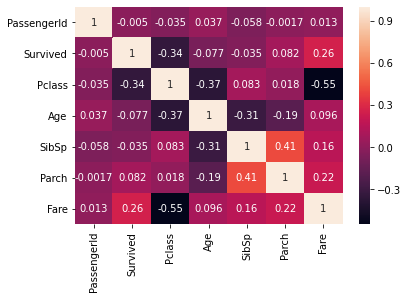

In [8]:
sns.heatmap(train_df.corr(), annot=True)

In [9]:
train_df[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


we can see that chances of female survival are more.

In [10]:
train_df[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


The people in higher class have higher chance of survival

In [11]:
train_df[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


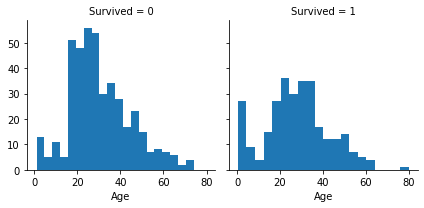

In [12]:
grid=sns.FacetGrid(train_df,col='Survived')
grid.map(plt.hist,"Age", bins=20)

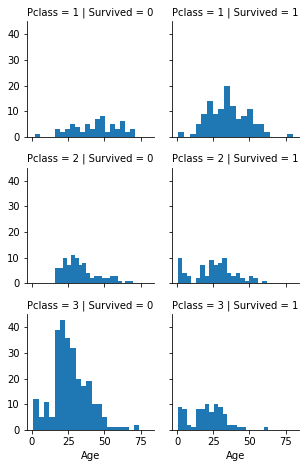

In [13]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass', height=2.2)
grid.map(plt.hist,"Age", bins=20)

C:\Users\coolbuddy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


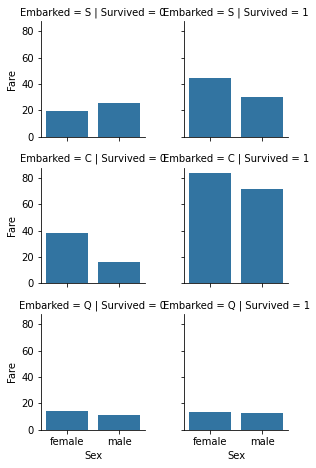

In [14]:
grid=sns.FacetGrid(train_df,col='Survived',row='Embarked',height=2.2)
grid.map(sns.barplot,'Sex','Fare',ci=None)

# Wrangle Data

In [15]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(train_df.shape,test_df.shape)
train_df=train_df.drop(['Cabin','Ticket'],axis=1)
test_df=test_df.drop(['Cabin','Ticket'],axis=1)
train_df.shape,test_df.shape

(891, 12) (418, 11)


((891, 10), (418, 9))

Extracting Titles from the Name columns

In [17]:
train_df['Title']=train_df.Name.str.extract(" ([A-Za-z]+)\.",expand=False)
train_df=train_df.drop('Name',axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [18]:
test_df['Title']=test_df.Name.str.extract(" ([A-Za-z]+)\.",expand=False)
test_df=test_df.drop('Name',axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [19]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Sir           1
Ms            1
Mme           1
Lady          1
Countess      1
Capt          1
Don           1
Name: Title, dtype: int64

In [20]:
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
train_df['Title']=train_df['Title'].replace(['Sir','Rev','Major','Lady','Jonkheer','Dr','Don','Countess','Col','Capt'],'Rare')
train_df['Title']=train_df['Title'].replace(['Mlle','Ms'],'Miss')
train_df['Title']=train_df['Title'].replace('Mme','Mrs')
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


In [22]:
test_df['Title']=test_df['Title'].replace(['Sir','Rev','Major','Lady','Jonkheer','Dr','Don','Countess','Col','Capt'],'Rare')
test_df['Title']=test_df['Title'].replace(['Mlle','Ms'],'Miss')
test_df['Title']=test_df['Title'].replace('Mme','Mrs')
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,Mr
1,893,3,female,47.0,1,0,7.0000,S,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,Mr
3,895,3,male,27.0,0,0,8.6625,S,Mr
4,896,3,female,22.0,1,1,12.2875,S,Mrs


In [23]:
train_df[['Title','Survived']].groupby('Title').mean().sort_values('Survived',ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [24]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [25]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

# Filling missing values

In [26]:
train_df.groupby(['Survived','Sex'])['Age'].agg([np.mean,np.std,'count','median'])

mean        std  count  median
Survived Sex                                        
0        female  25.046875  13.618591     64    24.5
         male    31.618056  14.056019    360    29.0
1        female  28.847716  14.175073    197    28.0
         male    27.276022  16.504803     93    28.0

In [27]:
train_df['Age']=train_df['Age'].fillna(-0.5)

cut=[-1,0,5,12,18,35,60,100]
labels=['Missing','Infant','Child','Teen','Young_adult','Adult','Senior']

train_df['Age_categories']=pd.cut(train_df['Age'],cut,labels=labels)
train_df.groupby(['Survived','Sex','Age_categories'],)['Age'].agg(['count'])


count
Survived Sex    Age_categories       
0        female Missing            17
                Infant              5
                Child               8
                Teen                9
                Young_adult        26
                Adult              16
         male   Missing           108
                Infant              8
                Child               8
                Teen               31
                Young_adult       195
                Adult             101
                Senior             17
1        female Missing            36
                Infant             16
                Child               3
                Teen               27
                Young_adult        94
                Adult              54
                Senior              3
         male   Missing            16
                Infant             15
                Child               6
                Teen                3
                Young_adult        43
                Adult              24
                Senior              2

In [28]:
rand_age1 = np.random.randint(25.046875 - 13.618591, 25.046875 + 13.618591, size = 17)
rand_age2 = np.random.randint(31.618056 - 14.056019, 31.618056 + 14.056019, size = 108)
rand_age3 = np.random.randint(28.847716 - 14.175073, 28.847716 + 14.175073, size = 36)
rand_age4 = np.random.randint(27.276022 - 16.504803, 27.276022 + 16.504803, size = 16)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)
rand_age3 = list(rand_age3)
rand_age4 = list(rand_age4)

In [29]:
train_df.loc[(train_df['Sex'] == 'female') & (train_df['Survived'] == 0) & (train_df['Age'] == -0.5),'Age'] = rand_age1
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0) & (train_df['Age'] == -0.5), 'Age'] = rand_age2
train_df.loc[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1) & (train_df['Age'] == -0.5),'Age'] = rand_age3
train_df.loc[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1) & (train_df['Age'] == -0.5), 'Age'] = rand_age4

In [30]:
test_df.groupby(['Sex'])['Age'].agg([np.mean,np.std,'count','median'])

,mean,std,count,median
Sex,,,,
female,30.272362,15.428613,127,27.0
male,30.272732,13.389528,205,27.0


In [31]:
test_df["Age"] = test_df["Age"].fillna(-0.5)
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
test_df["Age_categories"] = pd.cut(test_df["Age"],cut_points,labels=label_names)
test_df.groupby(['Sex','Age_categories'])[['Age']].agg([np.mean,'count'])

Age      
                            mean count
Sex    Age_categories                 
female Missing         -0.500000    25
       Infant           1.298571     7
       Child           10.200000     5
       Teenager        17.250000    12
       Young Adult     25.620968    62
       Adult           46.540541    37
       Senior          66.750000     4
male   Missing         -0.500000    61
       Infant           1.782000     5
       Child            7.937500     8
       Teenager        16.147059    17
       Young Adult     25.963964   111
       Adult           44.535088    57
       Senior          62.642857     7

In [32]:
rand_age1 = np.random.randint(30.272362 - 15.428613, 30.272362 + 15.428613, size = 25)
rand_age2 = np.random.randint(30.272732 - 13.389528, 30.272732 + 13.389528, size = 61)

rand_age1 = list(rand_age1)
rand_age2 = list(rand_age2)

test_df.loc[(test_df['Sex'] == 'female') & (test_df['Age'] == -0.5), 'Age'] = rand_age1
test_df.loc[(test_df['Sex'] == 'male') & (test_df['Age'] == -0.5), 'Age'] = rand_age2

In [33]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,892,3,male,34.5,0,0,7.8292,Q,Mr,Young Adult
1,893,3,female,47.0,1,0,7.0000,S,Mrs,Adult
2,894,2,male,62.0,0,0,9.6875,Q,Mr,Senior
3,895,3,male,27.0,0,0,8.6625,S,Mr,Young Adult
4,896,3,female,22.0,1,1,12.2875,S,Mrs,Young Adult


In [34]:
test_df.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              1
Embarked          0
Title             0
Age_categories    0
dtype: int64

In [35]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [36]:
test_df.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
Title             0
Age_categories    0
dtype: int64

In [37]:
train_df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          2
Title             0
Age_categories    0
dtype: int64

In [38]:
train_df['Embarked']=train_df['Embarked'].fillna('S')

In [39]:
train_df=train_df.drop(['PassengerId','Age_categories'],axis=1)
test_df=test_df.drop(['Age_categories'],axis=1)

cut_points = [0,5,12,18,35,60,100]
label_names = ['Infant','Child','Teen','Young_adult','Adult','Senior']
test_df["Age_categories"] = pd.cut(test_df["Age"],cut_points,labels=label_names)

cut=[0,5,12,18,35,60,100]
labels=['Infant','Child','Teen','Young_adult','Adult','Senior']

train_df['Age_categories']=pd.cut(train_df['Age'],cut,labels=labels)

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,0,3,male,22.0,1,0,7.2500,S,Mr,Young_adult
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Adult
2,1,3,female,26.0,0,0,7.9250,S,Miss,Young_adult
3,1,1,female,35.0,1,0,53.1000,S,Mrs,Young_adult
4,0,3,male,35.0,0,0,8.0500,S,Mr,Young_adult


In [41]:
dic={'male':0,'female':1}
train_df['Sex']=train_df['Sex'].map(dic)
test_df['Sex']=test_df['Sex'].map(dic)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,0,3,0,22.0,1,0,7.2500,S,Mr,Young_adult
1,1,1,1,38.0,1,0,71.2833,C,Mrs,Adult
2,1,3,1,26.0,0,0,7.9250,S,Miss,Young_adult
3,1,1,1,35.0,1,0,53.1000,S,Mrs,Young_adult
4,0,3,0,35.0,0,0,8.0500,S,Mr,Young_adult


In [42]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [43]:
dic={'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4}
train_df['Title']=train_df['Title'].map(dic)
test_df['Title']=test_df['Title'].map(dic)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,0,3,0,22.0,1,0,7.2500,S,0,Young_adult
1,1,1,1,38.0,1,0,71.2833,C,1,Adult
2,1,3,1,26.0,0,0,7.9250,S,2,Young_adult
3,1,1,1,35.0,1,0,53.1000,S,1,Young_adult
4,0,3,0,35.0,0,0,8.0500,S,0,Young_adult


In [44]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [45]:
dic={'S':0, 'C':1, 'Q':2}
train_df['Embarked']=train_df['Embarked'].map(dic)
test_df['Embarked']=test_df['Embarked'].map(dic)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,0,3,0,22.0,1,0,7.2500,0,0,Young_adult
1,1,1,1,38.0,1,0,71.2833,1,1,Adult
2,1,3,1,26.0,0,0,7.9250,0,2,Young_adult
3,1,1,1,35.0,1,0,53.1000,0,1,Young_adult
4,0,3,0,35.0,0,0,8.0500,0,0,Young_adult


In [46]:
train_df=train_df.drop('Age',axis=1)
test_df=test_df.drop('Age',axis=1)

In [47]:
dic={'Infant':0,'Child':1,'Teen':2,'Young_adult':3,'Adult':4,'Senior':5}
train_df["Age_categories"]=train_df['Age_categories'].map(dic)
test_df['Age_categories']=test_df['Age_categories'].map(dic)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_categories
0,0,3,0,1,0,7.2500,0,0,3
1,1,1,1,1,0,71.2833,1,1,4
2,1,3,1,0,0,7.9250,0,2,3
3,1,1,1,1,0,53.1000,0,1,3
4,0,3,0,0,0,8.0500,0,0,3


In [48]:
train_df['Family_size']=(train_df['SibSp']+train_df['Parch'])+1
train_df=train_df.drop(['SibSp','Parch'],axis=1)
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,0,3,0,7.2500,0,0,3,2
1,1,1,1,71.2833,1,1,4,2
2,1,3,1,7.9250,0,2,3,1
3,1,1,1,53.1000,0,1,3,2
4,0,3,0,8.0500,0,0,3,1


In [49]:
test_df['Family_size']=(test_df['SibSp']+test_df['Parch'])+1
test_df=test_df.drop(['SibSp','Parch'],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,892,3,0,7.8292,2,0.0,3,1
1,893,3,1,7.0000,0,1.0,4,2
2,894,2,0,9.6875,2,0.0,5,1
3,895,3,0,8.6625,0,0.0,3,1
4,896,3,1,12.2875,0,1.0,3,3


In [50]:
train_df['Fareband']=pd.qcut(train_df['Fare'],4)
train_df[['Survived','Fareband']].groupby('Fareband',as_index=False).mean().sort_values('Fareband')

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [51]:
train_df.loc[train_df['Fare']<=7.91,'Fare']=0
train_df.loc[((train_df['Fare']>=7.91)&(train_df['Fare']<14.454)),'Fare']=1
train_df.loc[((train_df['Fare']>=14.454)&(train_df['Fare']<31.0)),'Fare']=2
train_df.loc[train_df['Fare']>=31.0,'Fare']=3
train_df['Fare']=train_df['Fare'].astype(int)

train_df=train_df.drop('Fareband',axis=1)
train_df.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,0,3,0,0,0,0,3,2
1,1,1,1,3,1,1,4,2
2,1,3,1,1,0,2,3,1
3,1,1,1,3,0,1,3,2
4,0,3,0,1,0,0,3,1


In [52]:
test_df.loc[test_df['Fare']<7.91,'Fare']=0
test_df.loc[((test_df['Fare']>=7.91)&(test_df['Fare']<14.454)),'Fare']=1
test_df.loc[((test_df['Fare']>=14.454)&(test_df['Fare']<31.0)),'Fare']=2
test_df.loc[test_df['Fare']>=31.0,'Fare']=3

test_df['Fare']=test_df['Fare'].astype(int)
test_df.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,892,3,0,0,2,0.0,3,1
1,893,3,1,0,0,1.0,4,2
2,894,2,0,1,2,0.0,5,1
3,895,3,0,1,0,0.0,3,1
4,896,3,1,1,0,1.0,3,3


In [53]:
train_df.head(50)

,Survived,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,0,3,0,0,0,0,3,2
1,1,1,1,3,1,1,4,2
2,1,3,1,1,0,2,3,1
3,1,1,1,3,0,1,3,2
4,0,3,0,1,0,0,3,1
5,0,3,0,1,2,0,3,1
6,0,1,0,3,0,0,4,1
7,0,3,0,2,0,3,0,5
8,1,3,1,1,0,1,3,3
9,1,2,1,2,1,1,2,2


# Model Training

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [55]:
def base(train_df):
    X=train_df.drop('Survived',axis=1)
    y=train_df['Survived']
    X_train, X_test ,y_train,y_test=train_test_split(X,y,test_size=.20 ,random_state=2)
    
    models=['LogisticRegression','RandomForestClassifier','SVC','LinearSVC','KNeighborsClassifier','GaussianNB']
    
    Classifiers=[LogisticRegression(),RandomForestClassifier(n_estimators=100),SVC(),LinearSVC(),KNeighborsClassifier(),GaussianNB()]
    
    for name,clf in zip(models,Classifiers):
        model=clf.fit(X_train,y_train)
        
        pred=model.predict(X_test)
        acc=accuracy_score(y_test,pred)
        msg = "%s: %f" % (name, acc)
        print(msg)

In [56]:
base(train_df)

C:\Users\coolbuddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\coolbuddy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\coolbuddy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression: 0.782123
RandomForestClassifier: 0.787709
SVC: 0.776536
LinearSVC: 0.793296
KNeighborsClassifier: 0.776536
GaussianNB: 0.776536


As Random forest classifier have the best acuracy we will use it for predicting test data

In [57]:
test_df.head(-10)

,PassengerId,Pclass,Sex,Fare,Embarked,Title,Age_categories,Family_size
0,892,3,0,0,2,0.0,3,1
1,893,3,1,0,0,1.0,4,2
2,894,2,0,1,2,0.0,5,1
3,895,3,0,1,0,0.0,3,1
4,896,3,1,1,0,1.0,3,3
...,...,...,...,...,...,...,...,...
403,1295,1,0,3,0,0.0,2,1
404,1296,1,0,2,1,0.0,4,2
405,1297,2,0,1,1,0.0,3,1
406,1298,2,0,1,0,0.0,3,2


In [58]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']
X_train, X_test ,y_train,y_test=train_test_split(X,y,test_size=.20 ,random_state=2)
clf=RandomForestClassifier(n_estimators=100)
clf=clf.fit(X_train,y_train)


In [61]:
test_df['Title']=test_df['Title'].fillna('1')

In [63]:
main_test=test_df.drop('PassengerId',axis=1)
pre=clf.predict(main_test)


In [71]:
ans=pd.DataFrame({'PassenderId':test_df['PassengerId'],"Survived":pre.astype(int)})

In [72]:
ans.head(20)

,PassenderId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [69]:
ans.shape

(418, 1)